In [6]:

%pip install numpy pandas seaborn matplotlib

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
sns.set_theme()

Load The Data

In [8]:
import sys
import os

# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath("../src"))

# Now you can import your module
from data_cleaning import clean_data

# Use the function
filepath = "../data/MachineLearningRating_v3.txt"
df_cleaned = clean_data(filepath)
df_cleaned.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


○	Data Summarization:

In [9]:
df_cleaned.columns.tolist()

['UnderwrittenCoverID',
 'PolicyID',
 'TransactionMonth',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'CustomValueEstimate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'WrittenOff',
 'Rebuilt',
 'Converted',
 'CrossBorder',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims']

In [10]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    1000098 non-null  object

In [11]:
df_cleaned.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


In [12]:
df_cleaned.shape

(1000098, 52)

○	Data Quality Assessment:

In [13]:
df_cleaned.isnull().sum().sort_values(ascending=False)


NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
VehicleType                     552
VehicleIntroDate                552
make                            552
cubiccapacity                   552
Model                           552
Cylinders                       552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
mmcode                          552
CapitalOutstanding                2
SubCrestaZone                     0
PostalCode                        0
ItemType                          0
Province                          0
Country                           0
LegalType                         0
MainCrestaZone              

In [14]:
# Calculate percentage of missing values per column
missing_percent = df_cleaned.isnull().sum() / len(df_cleaned) * 100

# Sort in descending order
missing_percent = missing_percent.sort_values(ascending=False)

# Display result
missing_percent.round(2)  # Optional: round to 2 decimal places


NumberOfVehiclesInFleet     100.00
CrossBorder                  99.93
CustomValueEstimate          77.96
Rebuilt                      64.18
Converted                    64.18
WrittenOff                   64.18
NewVehicle                   15.33
Bank                         14.59
AccountType                   4.02
MaritalStatus                 0.83
VehicleType                   0.06
VehicleIntroDate              0.06
make                          0.06
cubiccapacity                 0.06
Model                         0.06
Cylinders                     0.06
bodytype                      0.06
kilowatts                     0.06
NumberOfDoors                 0.06
mmcode                        0.06
CapitalOutstanding            0.00
SubCrestaZone                 0.00
PostalCode                    0.00
ItemType                      0.00
Province                      0.00
Country                       0.00
LegalType                     0.00
MainCrestaZone                0.00
Citizenship         

Missing Values Summary – Interpretation
We assessed the percentage of missing values in each column of the cleaned dataset. Here's what we found:

Severely Missing (≥ 60%):
Several columns such as NumberOfVehiclesInFleet (100%), CrossBorder (99.93%), and Rebuilt, Converted, WrittenOff (~64%) have extremely high levels of missing data. These may not be usable for analysis or modeling unless domain knowledge justifies imputation or selective use.

Moderately Missing (15–60%):
CustomValueEstimate has ~78% missing data, which might be handled through imputation if important. However, caution is needed due to the high missing rate.

Low to Minimal Missing (< 15%):
Columns like Bank (14.6%), AccountType (4%), and MaritalStatus (0.83%) have relatively few missing entries, making them good candidates for imputation or categorical "unknown" filling.

Negligible or No Missing Data:
The majority of columns — including critical ones like TotalPremium, TotalClaims, TransactionMonth, Province, VehicleType, and Gender — are complete and ready for analysis.

In [15]:
cols_to_drop = [
    'NumberOfVehiclesInFleet',  # 100% missing
    'CrossBorder',              # 99.93%
    'CustomValueEstimate',      # 77.96%
    'Rebuilt',                  # 64.18%
    'Converted',                # 64.18%
    'WrittenOff'                # 64.18%
]
df_cleaned.drop(columns=cols_to_drop, inplace=True)

In [3]:
df_cleaned.shape

NameError: name 'df_cleaned' is not defined

○	Univariate Analysis:

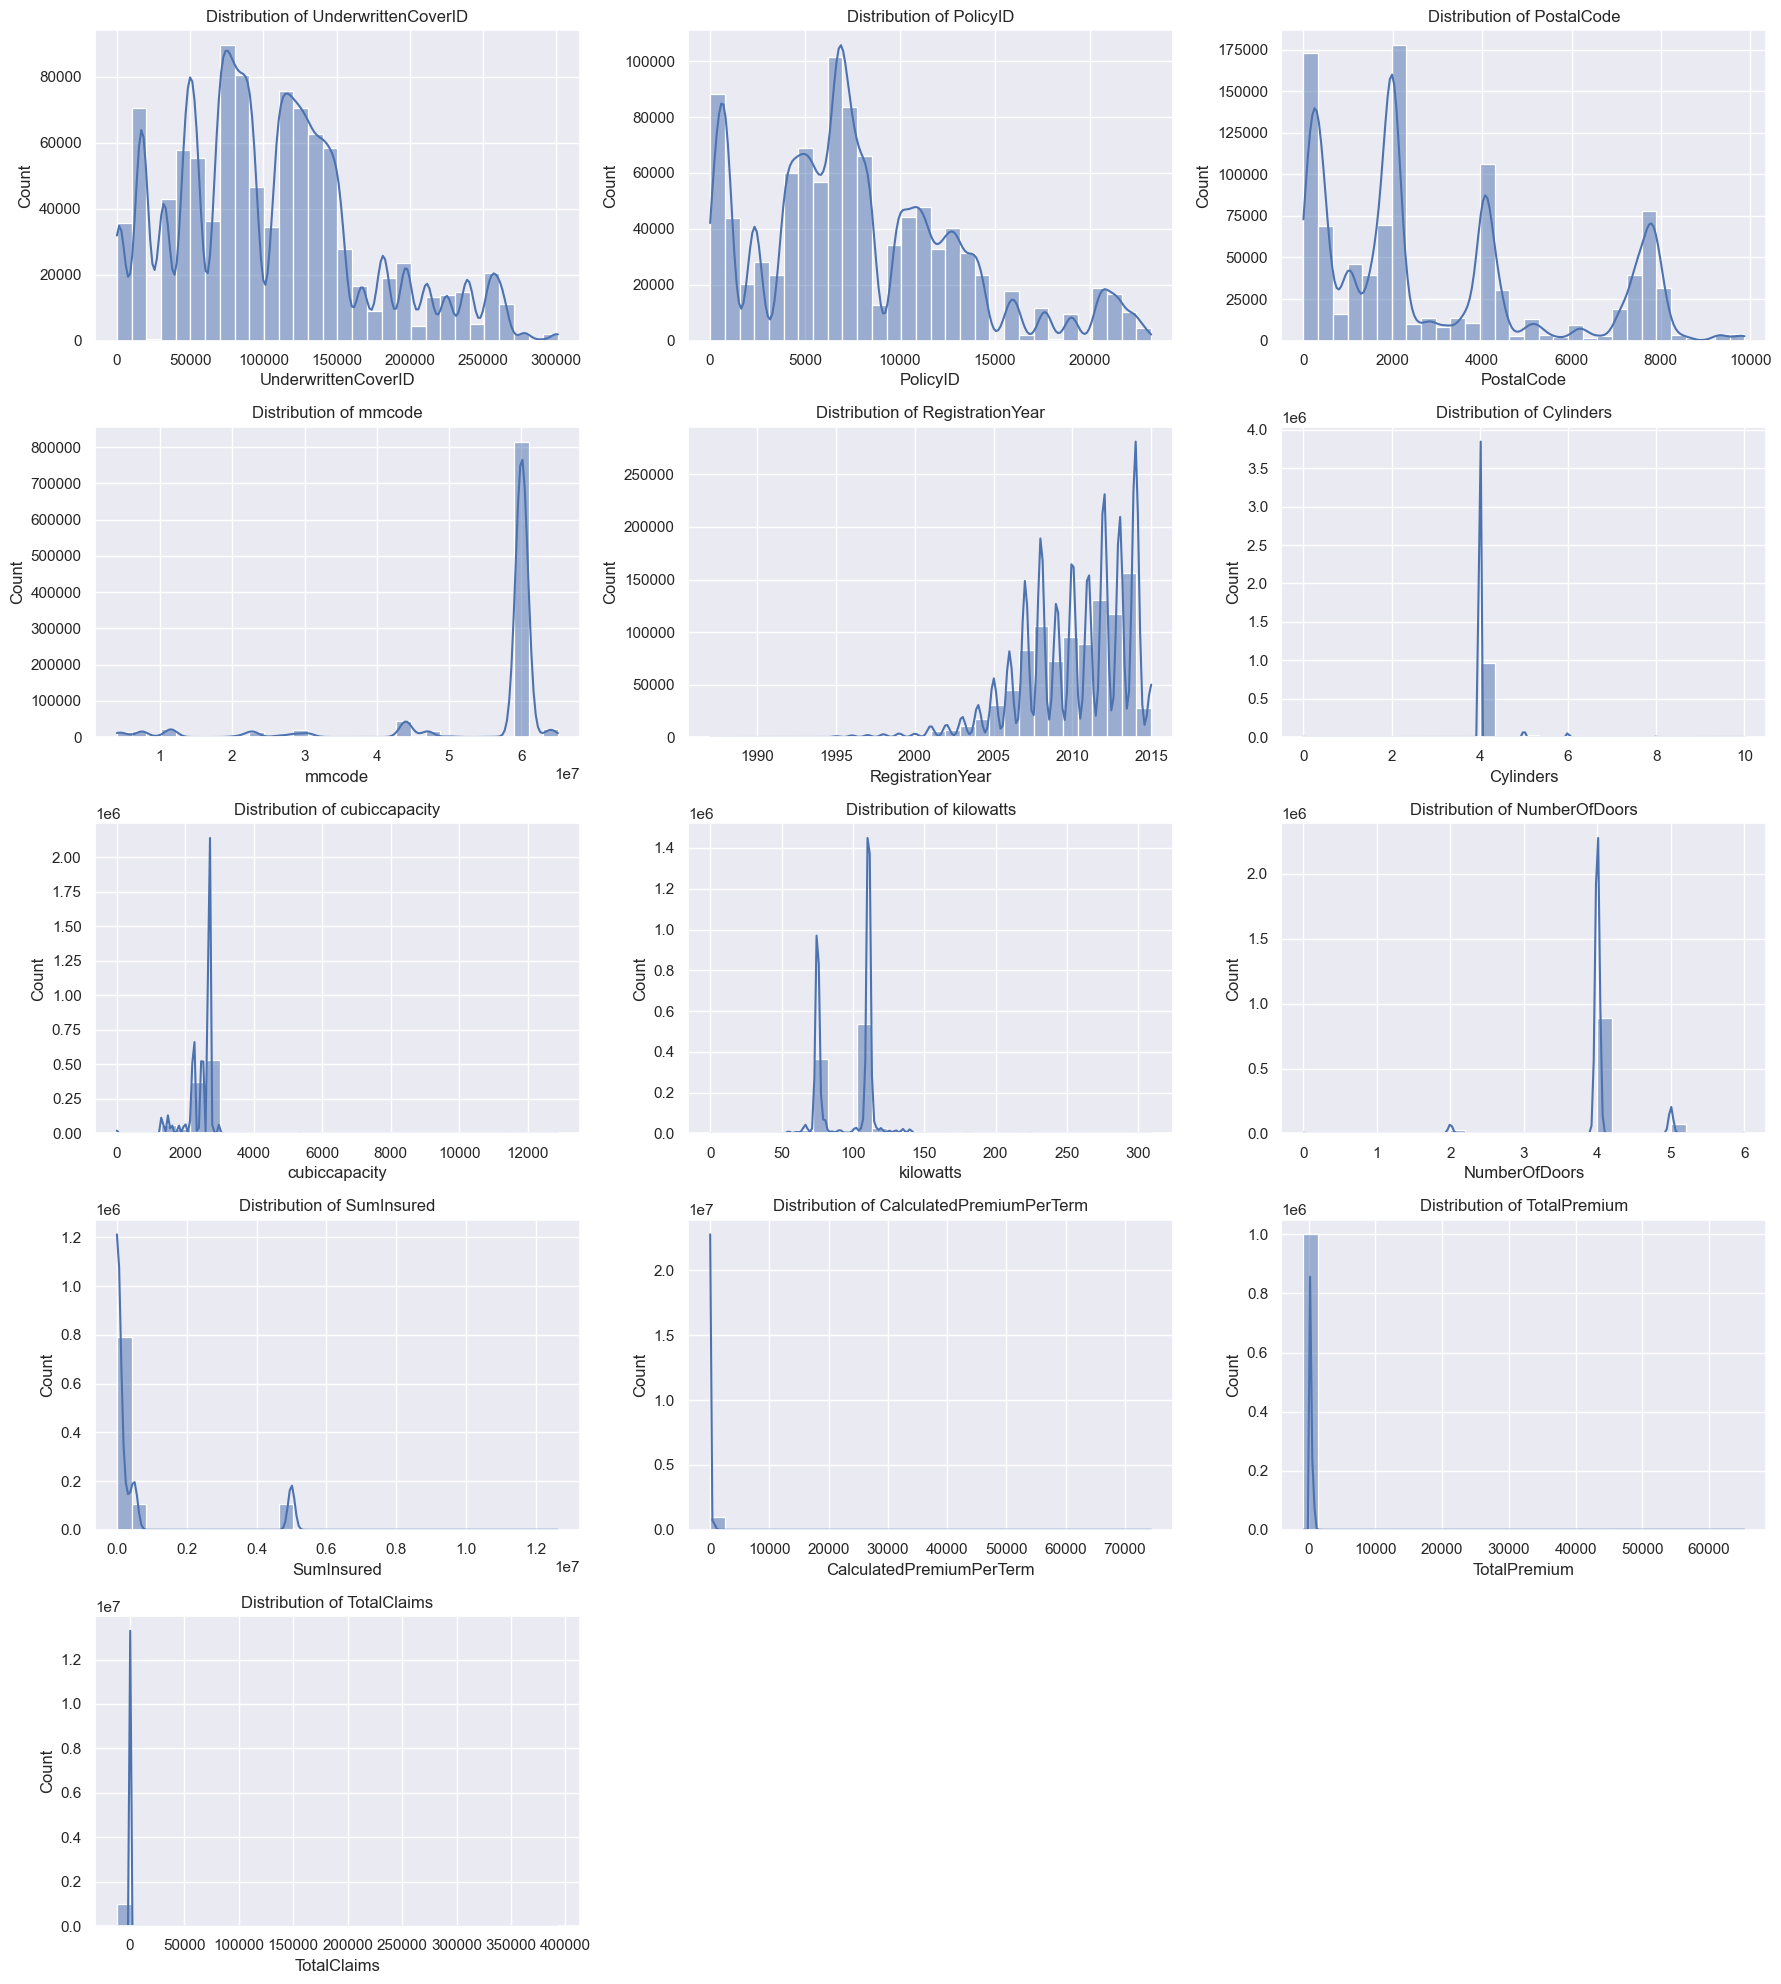

In [16]:

numeric_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

# Set number of plots per row
plots_per_row = 3
num_plots = len(numeric_cols)
num_rows = -(-num_plots // plots_per_row)  # Ceiling division

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We have 33 categorical columns.
We have 13 numerical columns.


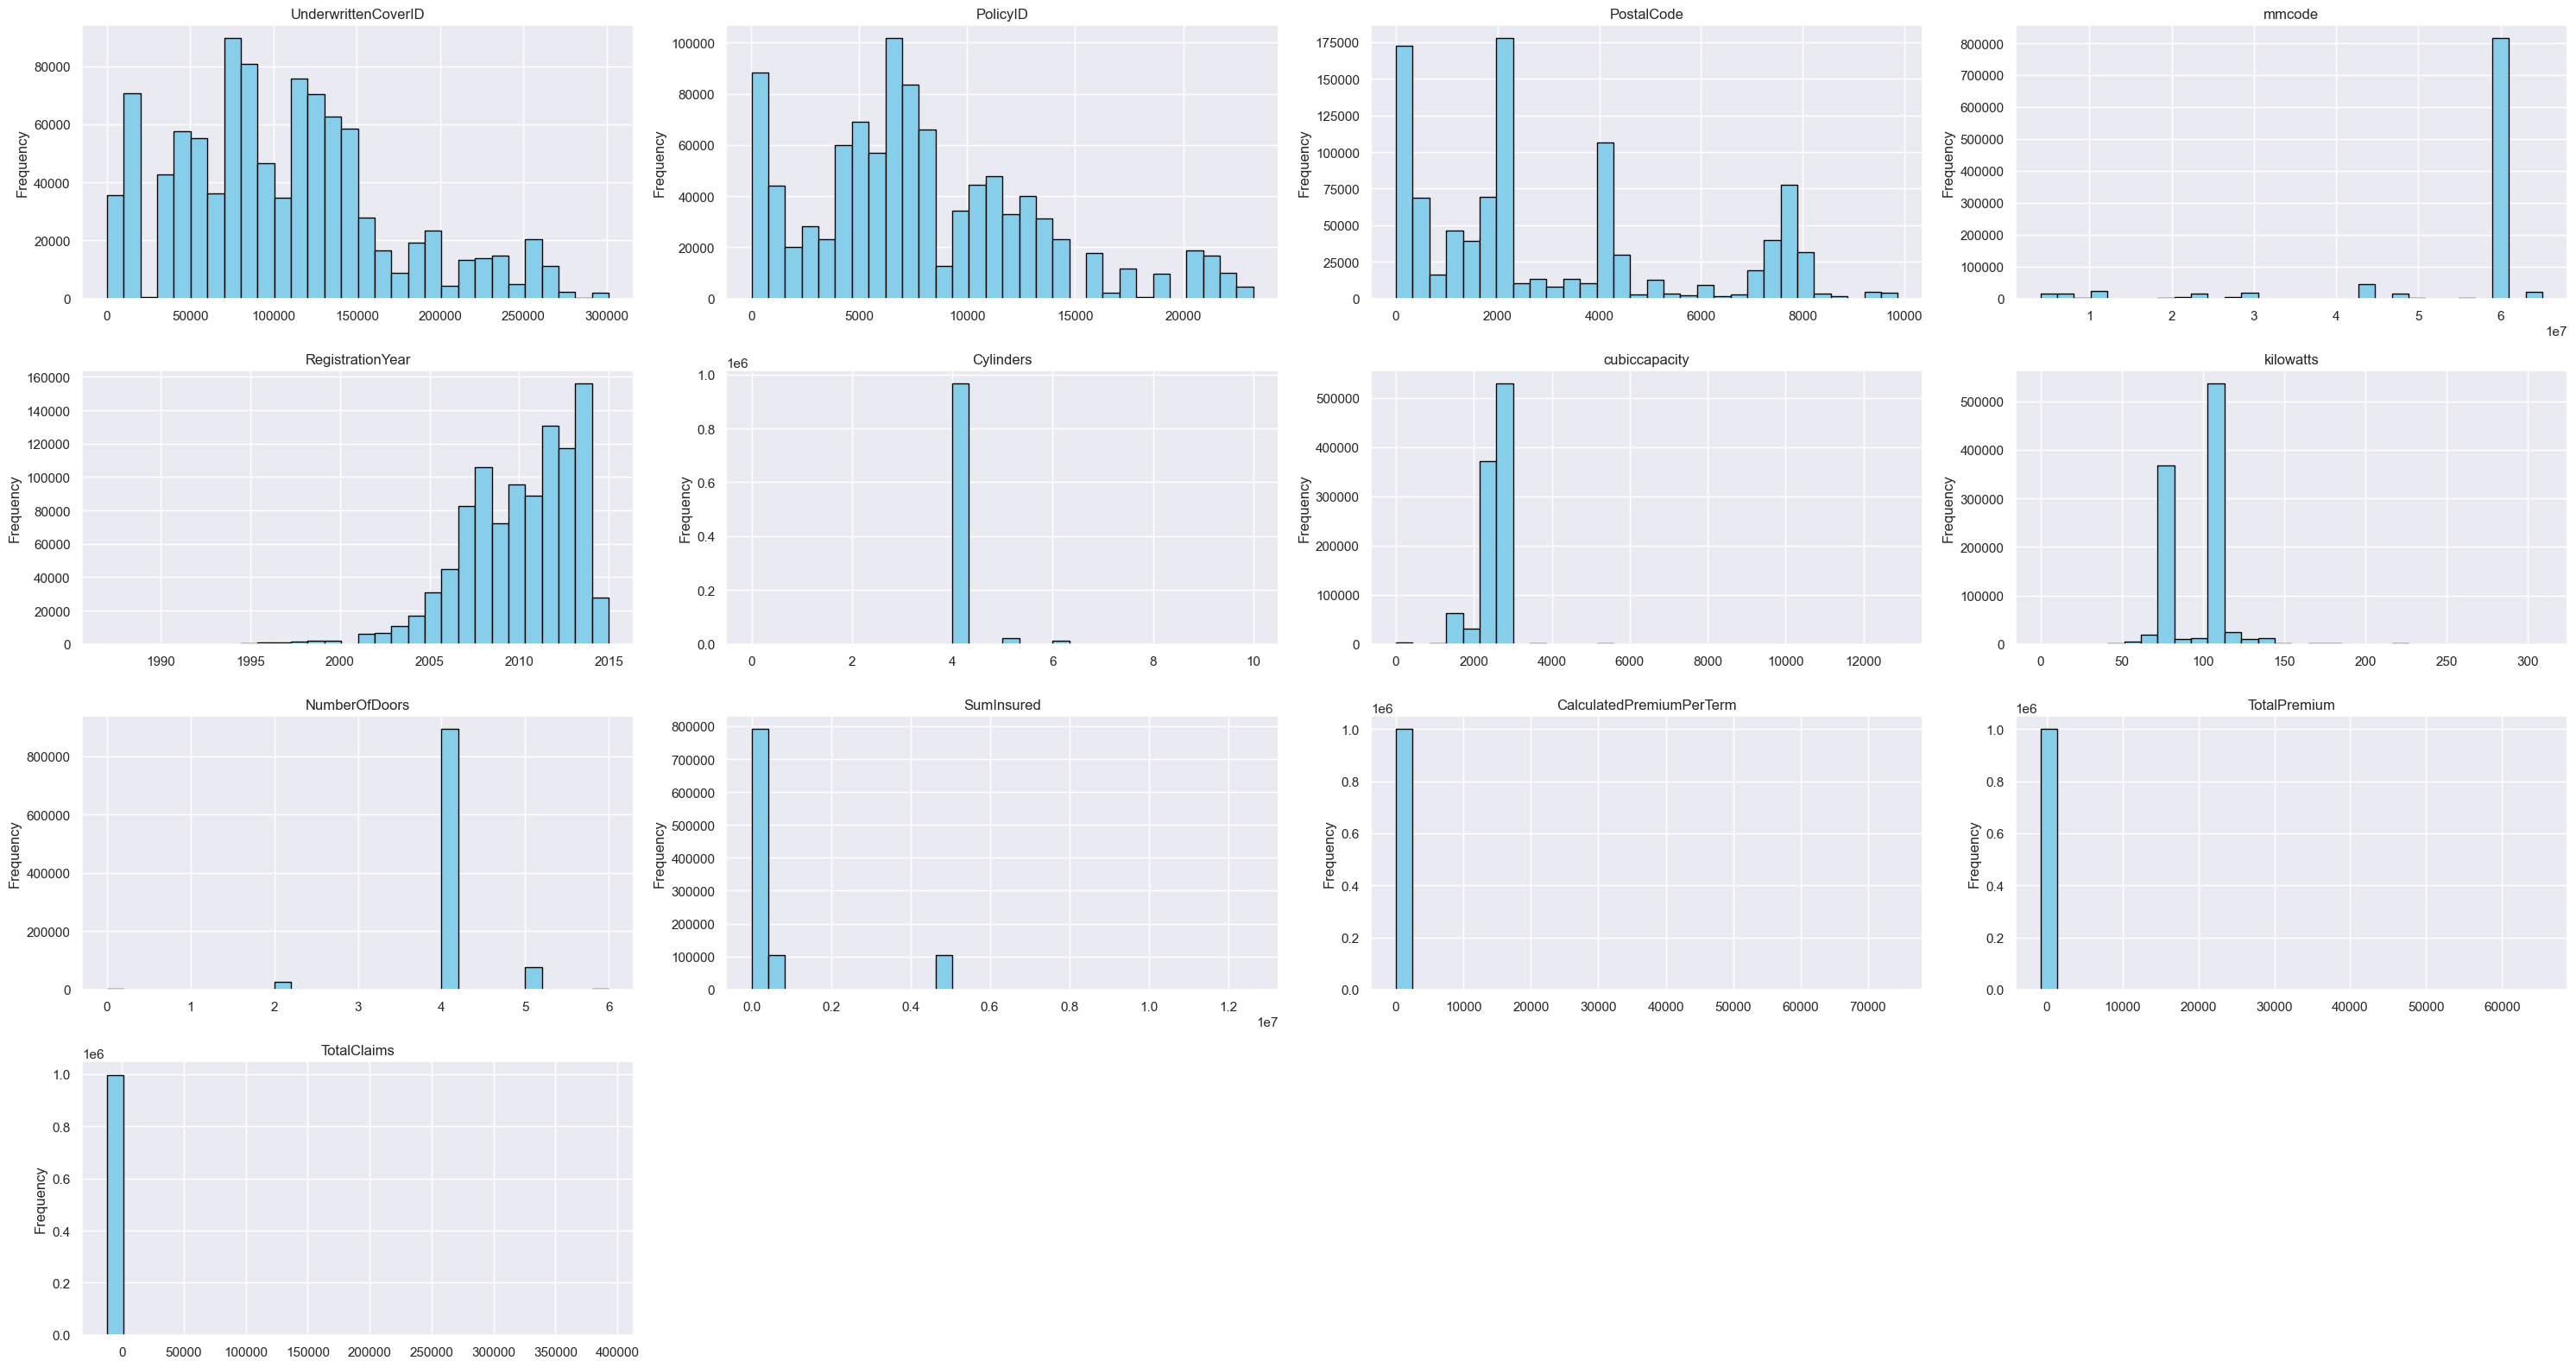

In [17]:


# Step 1: Identify numerical and categorical columns
numerical_columns = df_cleaned._get_numeric_data().columns.tolist()
bool_columns = ["IsVATRegistered"]

# Remove boolean columns from numerical
numerical_columns = [col for col in numerical_columns if col not in bool_columns]

# Define categorical columns (including bools)
categorical_columns = [col for col in df_cleaned.columns if col not in numerical_columns]
categorical_columns = list(set(categorical_columns + bool_columns))

# Summary
print(f"We have {len(categorical_columns)} categorical columns.")
print(f"We have {len(numerical_columns)} numerical columns.")

# Step 2: Plot histograms of numerical columns
NUM_COLS = 4
num_rows = math.ceil(len(numerical_columns) / NUM_COLS)

fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, figsize=(30, 4 * num_rows))
axes = axes.flatten()

for idx, column in enumerate(numerical_columns):
    axes[idx].hist(df_cleaned[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{column}', fontsize=12)
    axes[idx].set_ylabel('Frequency')

# Hide any empty plots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [21]:
%pip install nbformat plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

# Set number of columns per row
NUM_COLS = 3

# Calculate required number of rows
num_rows = math.ceil(len(categorical_columns) / NUM_COLS)

# Create subplot figure
fig = make_subplots(
    rows=num_rows,
    cols=NUM_COLS,
    subplot_titles=categorical_columns,
    vertical_spacing=0.08,
    horizontal_spacing=0.08
)

for idx, column in enumerate(categorical_columns):
    row = idx // NUM_COLS + 1
    col = idx % NUM_COLS + 1

    # Get value counts
    value_counts = df_cleaned[column].value_counts().head(20)

    fig.add_trace(
        go.Bar(
            x=value_counts.index.astype(str),
            y=value_counts.values,
            name=column,
            hovertemplate=f"{column}: %{{x}}<br>Count: %{{y}}<extra></extra>"
        ),
        row=row,
        col=col
    )

# Update layout
fig.update_layout(
    height=350 * num_rows,
    width=1200,
    title_text="Top 20 Category Distributions for Categorical Columns",
    showlegend=False
)

fig.update_xaxes(tickangle=45)

fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

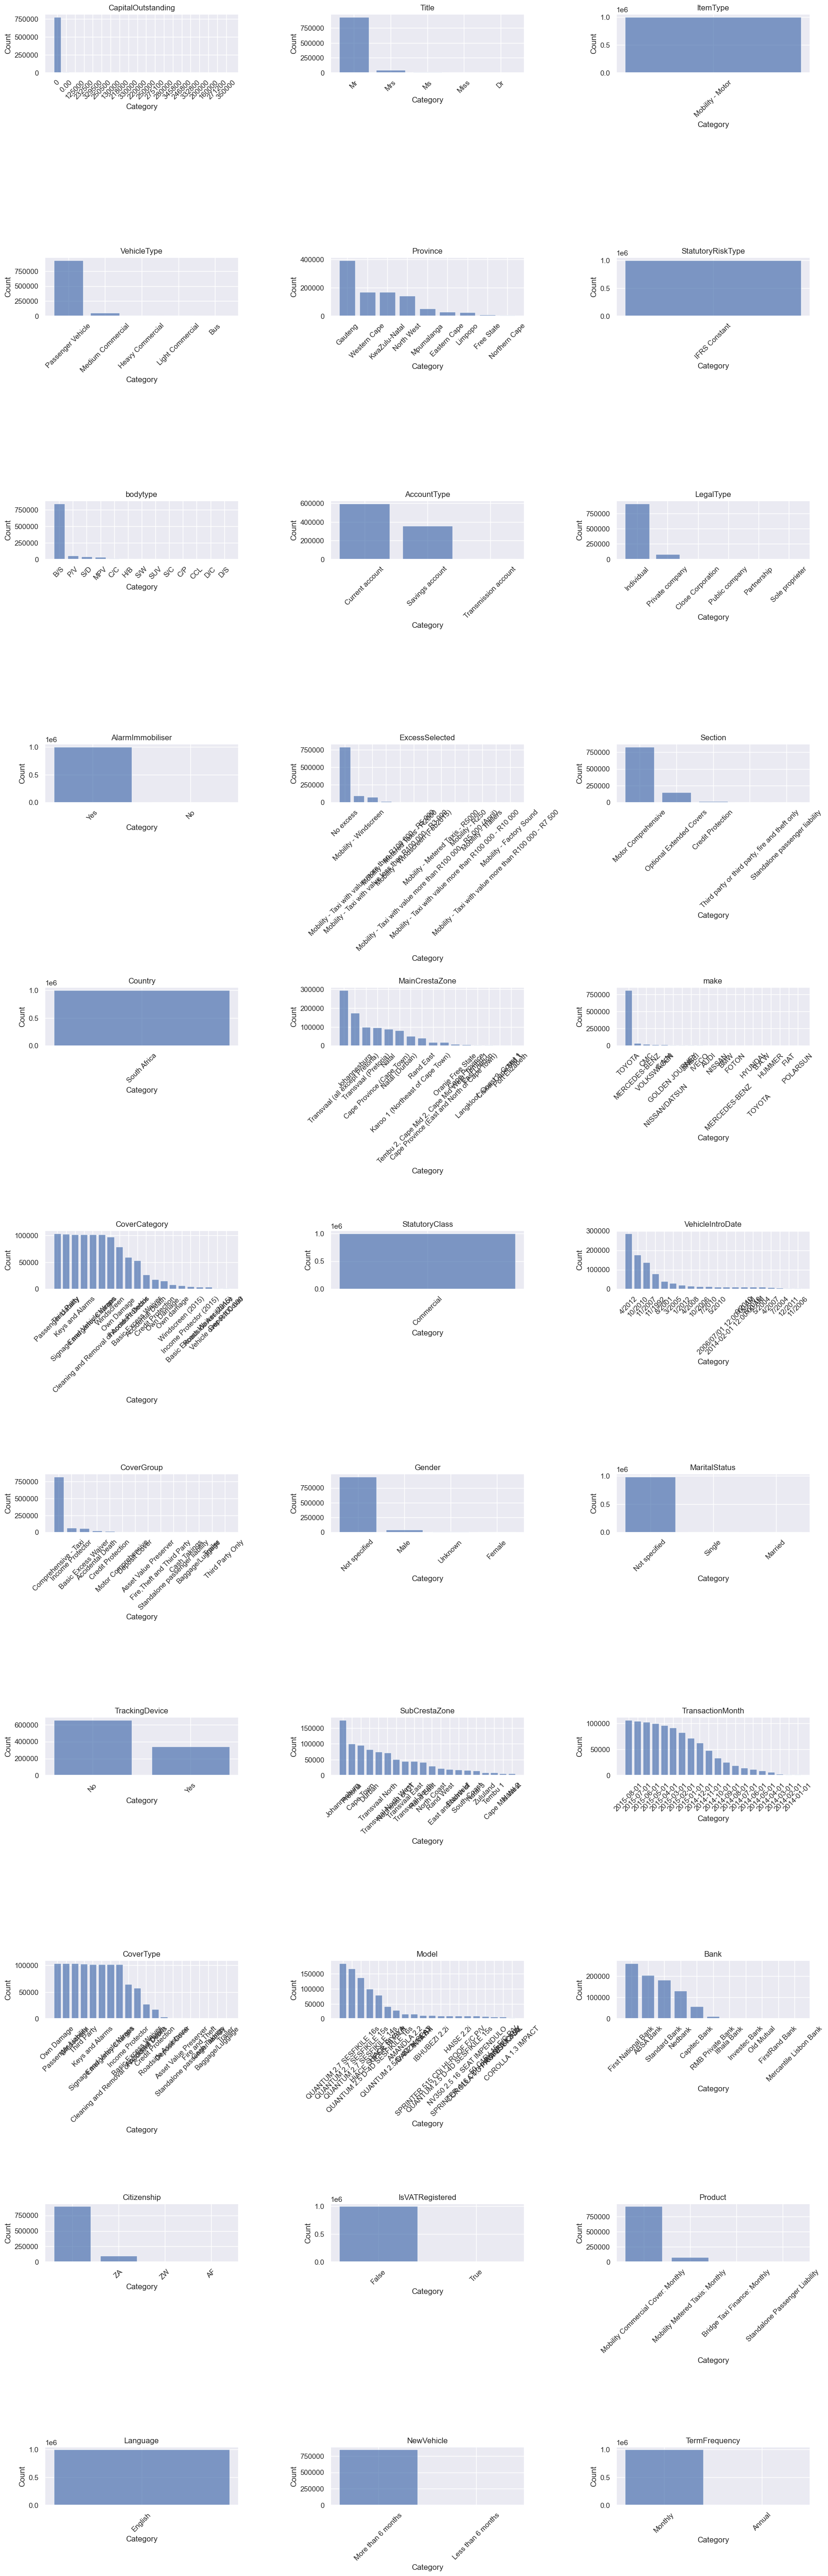

In [22]:


# Set number of columns per row
NUM_COLS = 3

# Calculate required number of rows
num_rows = math.ceil(len(categorical_columns) / NUM_COLS)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, figsize=(6 * NUM_COLS, 5 * num_rows))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns):
    value_counts = df_cleaned[column].value_counts().sort_values(ascending=False)

    # Limit to top 20 categories to prevent overcrowding
    value_counts = value_counts.head(20)

    axes[idx].bar(value_counts.index.astype(str), value_counts.values, alpha=0.7)
    axes[idx].set_title(column)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel("Count")
    axes[idx].set_xlabel("Category")

# Hide unused subplots (if any)
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis("off")

plt.tight_layout(pad=2.0)
plt.show()


○	Bivariate 

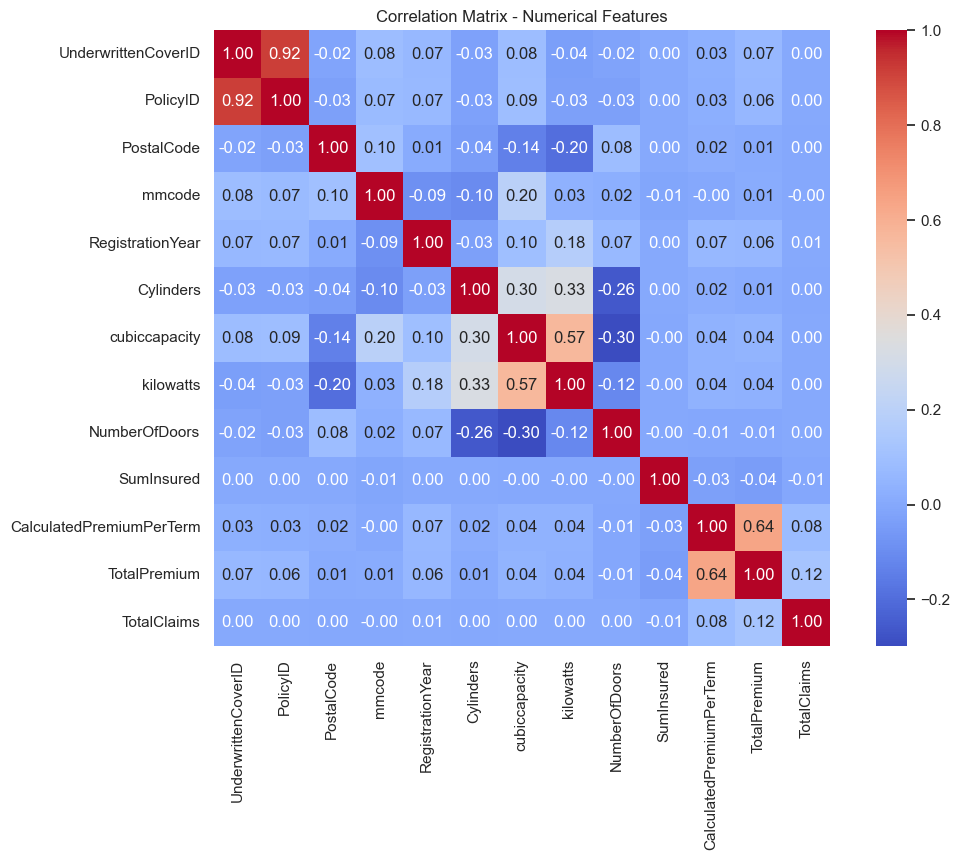

In [23]:

# Compute correlation matrix for numerical columns
corr_matrix = df_cleaned[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Numerical Features")
plt.show()


Scatter Plot

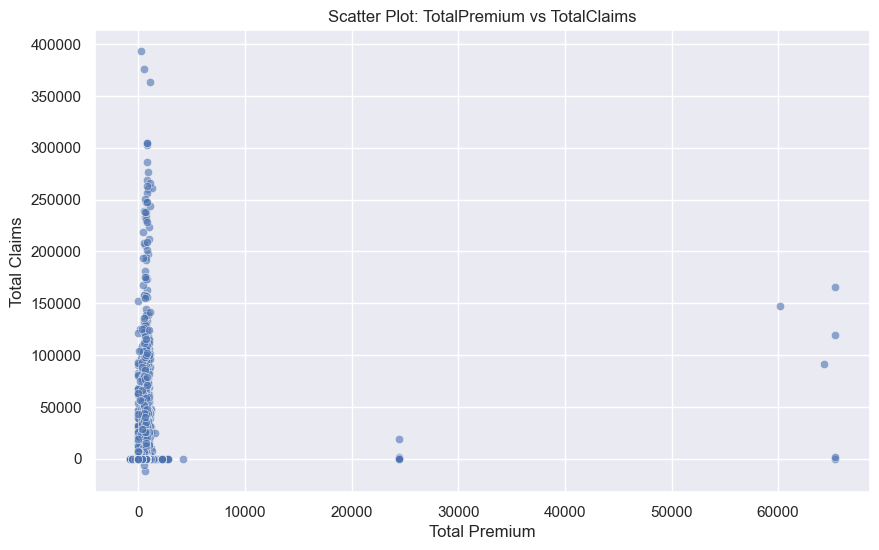

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot: TotalPremium vs TotalClaims")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.show()


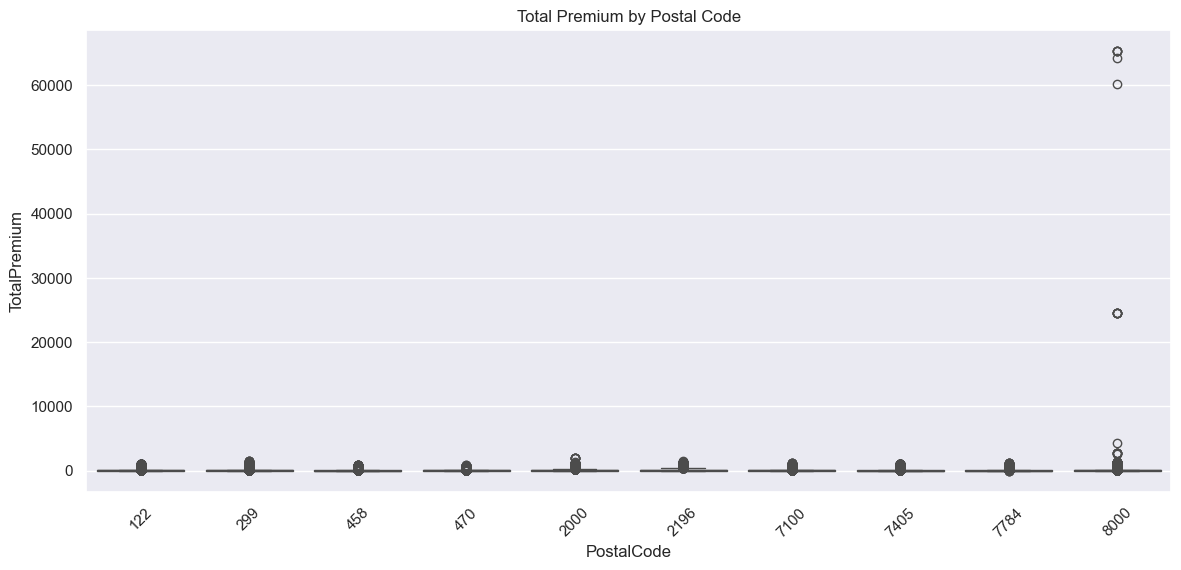

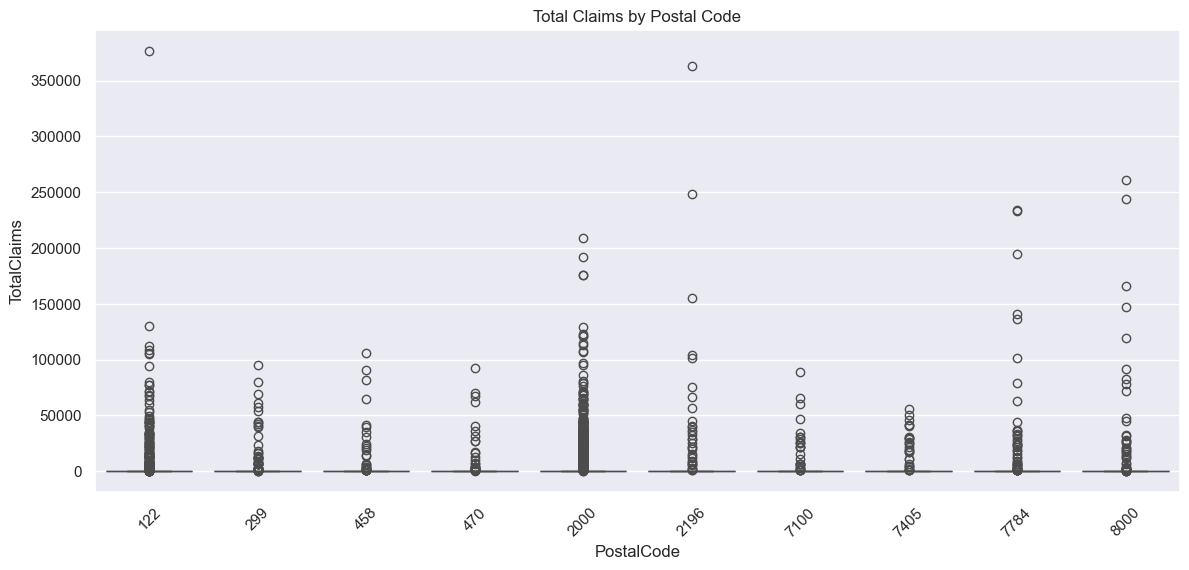

In [25]:
top_zipcodes = df_cleaned['PostalCode'].value_counts().head(10).index
filtered_data = df_cleaned[df_cleaned['PostalCode'].isin(top_zipcodes)]

plt.figure(figsize=(14, 6))
sns.boxplot(x="PostalCode", y="TotalPremium", data=filtered_data)
plt.title("Total Premium by Postal Code")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x="PostalCode", y="TotalClaims", data=filtered_data)
plt.title("Total Claims by Postal Code")
plt.xticks(rotation=45)
plt.show()


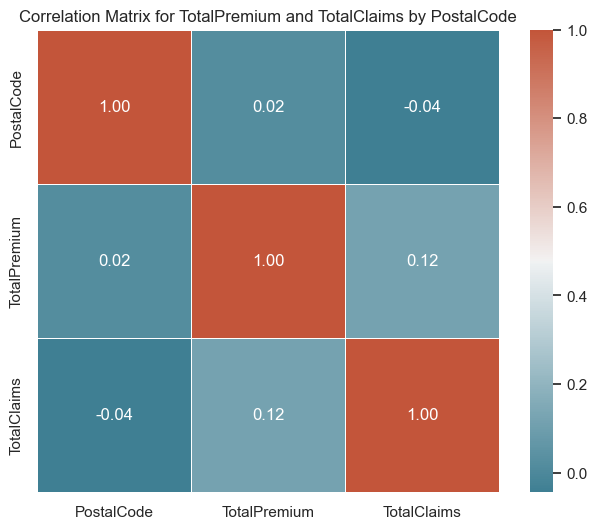

In [26]:


# Group by PostalCode and calculate mean of numerical values
zipcode_agg = df_cleaned.groupby("PostalCode")[["TotalPremium", "TotalClaims"]].mean()

# Reset index to make PostalCode a column
zipcode_agg = zipcode_agg.reset_index()

# Compute the correlation matrix
corr_matrix = zipcode_agg.corr()

# Create a diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix for TotalPremium and TotalClaims by PostalCode")
plt.show()


○	Data Comparison

In [28]:
%pip install nbformat

import plotly.express as px

# Count CoverType per Province
cover_by_province = df_cleaned.groupby(['Province', 'CoverType']).size().reset_index(name='count')

# Plot with Plotly
fig = px.bar(
    cover_by_province,
    x='Province',
    y='count',
    color='CoverType',
    barmode='group',
    title='Distribution of Insurance Cover Types by Province',
    labels={'count': 'Number of Policies'},
    hover_data={'count': True, 'CoverType': True, 'Province': True}
)

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title='Cover Type'
)

fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

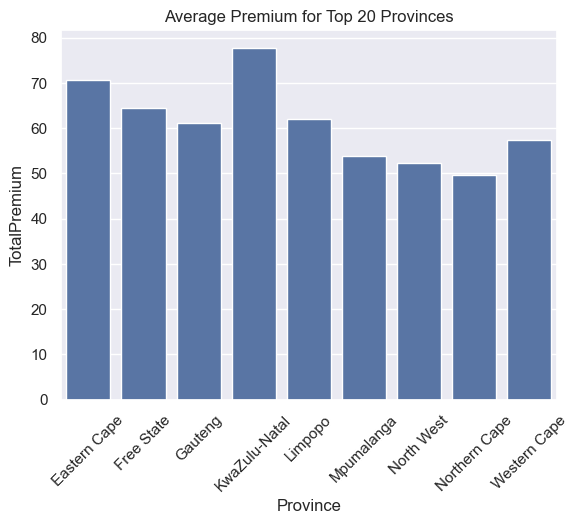

In [ ]:
# Example: Top 20 Provinces by TotalPremium
top_provinces = df_cleaned.groupby('Province')['TotalPremium'].sum().nlargest(20).index

filtered_data = df_cleaned[df_cleaned['Province'].isin(top_provinces)]

# Plot average premium by these provinces
premium_by_province = filtered_data.groupby('Province')['TotalPremium'].mean().reset_index()

sns.barplot(data=premium_by_province, x='Province', y='TotalPremium')
plt.title("Average Premium for Top 20 Provinces")
plt.xticks(rotation=45)
plt.show()


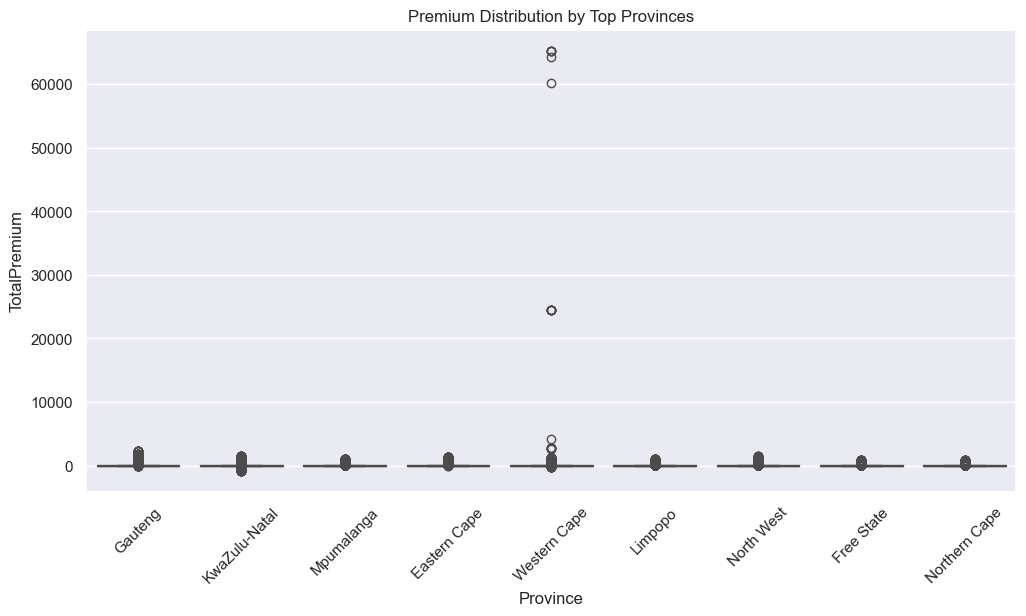

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned[df_cleaned['Province'].isin(top_provinces)], x='Province', y='TotalPremium')
plt.title("Premium Distribution by Top Provinces")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming your cleaned data is in 'data' DataFrame

# Aggregate average premium by Province
premium_by_province = df_cleaned.groupby('Province')['TotalPremium'].mean().reset_index()

# Plot interactive bar chart
fig = px.bar(
    premium_by_province, 
    x='Province', 
    y='TotalPremium',
    title='Average Total Premium by Province',
    labels={'TotalPremium': 'Average Total Premium', 'Province': 'Province'},
    hover_data={'TotalPremium': ':.2f'},  # Show premium with 2 decimals on hover
)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x labels for better readability
fig.show()


outlier

In [ ]:

import plotly.express as px
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define number of columns per row
NUM_COLS = 3
numerical_columns = df_cleaned.select_dtypes(include='number').columns.tolist()

# Calculate number of rows needed
num_rows = math.ceil(len(numerical_columns) / NUM_COLS)

# Create subplot grid
fig = make_subplots(
    rows=num_rows,
    cols=NUM_COLS,
    subplot_titles=numerical_columns,
    vertical_spacing=0.15,
    horizontal_spacing=0.08
)

# Add box plots
for idx, column in enumerate(numerical_columns):
    row = idx // NUM_COLS + 1
    col = idx % NUM_COLS + 1

    fig.add_trace(
        go.Box(
            y=df_cleaned[column],
            name=column,
            boxpoints='outliers',
            marker_color='teal',
            line=dict(width=1),
            showlegend=False
        ),
        row=row,
        col=col
    )

# Update layout
fig.update_layout(
    height=350 * num_rows,
    width=1200,
    title_text="Box Plots for Outlier Detection in Numerical Columns",
    showlegend=False
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of numerical columns from your cleaned DataFrame
numerical_columns = df_cleaned.select_dtypes(include='number').columns.tolist()

# Set number of columns per row
NUM_COLS = 3
num_rows = math.ceil(len(numerical_columns) / NUM_COLS)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, figsize=(6 * NUM_COLS, 5 * num_rows))
axes = axes.flatten()

# Plot boxplots
for idx, column in enumerate(numerical_columns):
    sns.boxplot(y=df_cleaned[column], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f"Box Plot of {column}")
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(column)

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis("off")

plt.tight_layout(pad=2.0)
plt.show()


NameError: name 'df_cleaned' is not defined